In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import os
import numpy as np
import glob
import scipy
import seaborn

In [2]:

uni = "20221122_homo_test"
# uni = "202211101_model6_1to10_E_"

geo = 1 ## 1 jsns2 / 2 cylinder / 3 sphere

# path = "/users/yewzzang/work/JSNS2_vertex/result/" + uni +"*/train.csv"
# train_path = glob.glob(path)
# train_list = [file for file in train_path if file.endswith(".csv")]


path = "/users/yewzzang/work/JSNS2_vertex/result/*"+uni +"*/*"+uni +".csv"
pred_path = glob.glob(path)
pred_list = [file for file in pred_path if file.endswith(".csv")]


path2 = "/users/yewzzang/work/JSNS2_vertex/result/*"+uni +"*/*"+uni +"_batch.csv"
pred_path2 = glob.glob(path2)
pred_list2 = [file for file in pred_path2 if file.endswith(".csv")]



In [3]:
ddf = pd.read_csv(pred_list2[0])

In [4]:
energy = np.array(ddf['energy'])

In [5]:
df = pd.read_csv(pred_list[0])

In [6]:
pred = np.array(df['prediction']).reshape(-1,3)
pred.shape

(20026, 3)

In [7]:
label = np.array(df['label']).reshape(-1,3)
label.shape

(20026, 3)

In [8]:
jade = np.array(df['jade']).reshape(-1,3)
jade.shape

(20026, 3)

In [9]:
df

,prediction,label,jade
0,1.309924,1.250340,1.311089
1,0.329769,0.377090,0.338096
2,0.708647,0.619414,0.708412
3,-0.948372,-0.898846,-1.004797
4,-0.620504,-0.593851,-0.627391
...,...,...,...
60073,-0.854620,-0.735324,-0.814615
60074,-1.062293,-1.191900,-1.242992
60075,0.887185,0.936724,0.992286
60076,0.678585,0.605505,0.628562


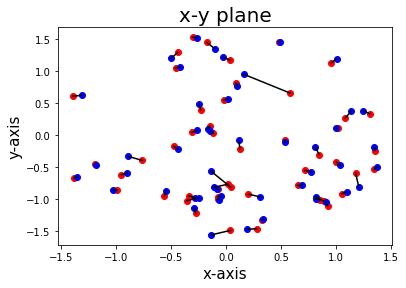

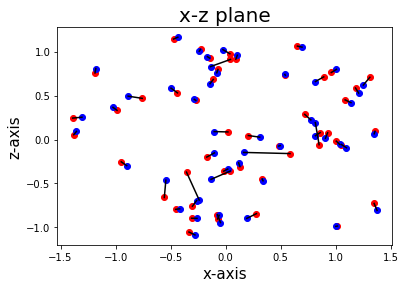

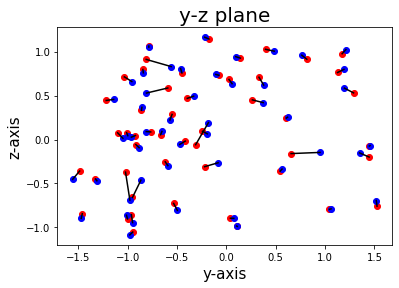

In [10]:
plt.scatter(pred[:50,0],pred[:50,1],color='r')
plt.scatter(label[:50,0],label[:50,1],color='b')
for i in range(50):
    plt.plot([pred[i,0],label[i,0]],[pred[i,1],label[i,1]],'k-')
plt.title('x-y plane',fontsize=20)
plt.xlabel('x-axis',fontsize=15)
plt.ylabel('y-axis',fontsize=15)
plt.show()

plt.scatter(pred[:50,0],pred[:50,2],color='r')
plt.scatter(label[:50,0],label[:50,2],color='b')
for i in range(50):
    plt.plot([pred[i,0],label[i,0]],[pred[i,2],label[i,2]],'k-')
plt.title('x-z plane',fontsize=20)
plt.xlabel('x-axis',fontsize=15)
plt.ylabel('z-axis',fontsize=15)
plt.show()

plt.scatter(pred[:50,1],pred[:50,2],color='r')
plt.scatter(label[:50,1],label[:50,2],color='b')
for i in range(50):
    plt.plot([pred[i,1],label[i,1]],[pred[i,2],label[i,2]],'k-')
plt.title('y-z plane',fontsize=20)
plt.xlabel('y-axis',fontsize=15)
plt.ylabel('z-axis',fontsize=15)
plt.show()




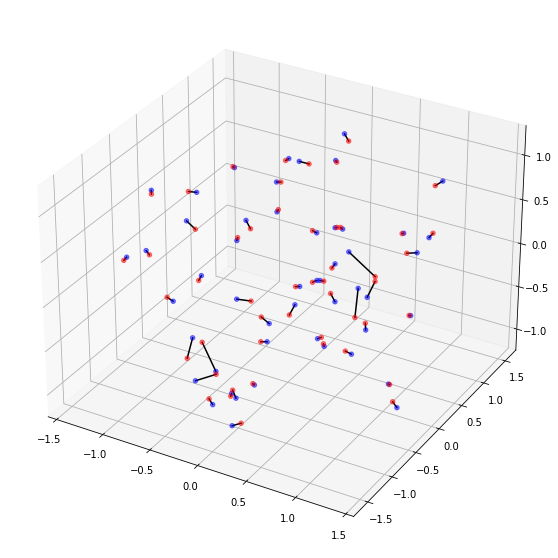

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pred[:50,0], pred[:50,1], pred[:50,2], color = 'r', alpha = 0.5)
ax.scatter(label[:50,0], label[:50,1], label[:50,2], color = 'b', alpha = 0.5)
# ax.plot3D([0,1],[0,1],[0,1])
# ax.plot3D([pred[:1,0][0],label[:1,0][0]],[pred[:1,1][0],label[:1,1][0]],[pred[:1,2][0],label[:1,2][0]])
for i in range(50):
    ax.plot3D([pred[i,0],label[i,0]],
               [pred[i,1],label[i,1]],
                [pred[i,2],label[i,2]],'black')


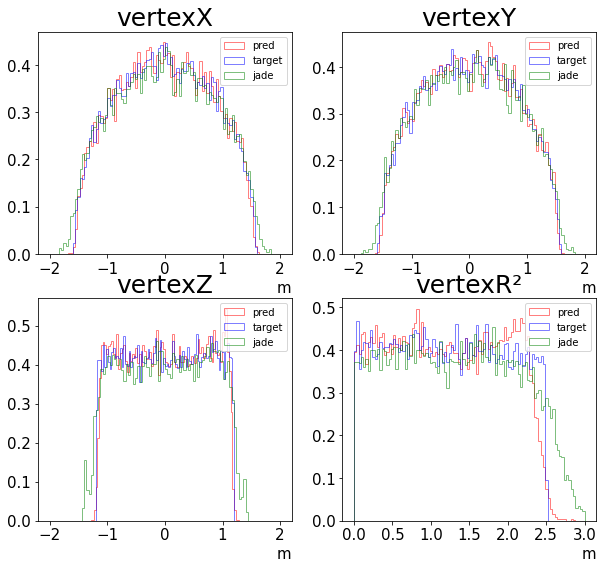

In [12]:
plt.rcParams['figure.figsize'] = (10, 9)
plt.subplot(2,2,1)
######### jsns2 geo
plt.hist(pred[:,0], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
plt.hist(label[:,0], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')

plt.hist(jade[:,0], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')

# plt.hist(jade[:,0], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')
plt.title('vertexX',fontsize = 25)
# plt.xlim([-0.0005,0])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()


plt.subplot(2,2,2)

plt.hist(pred[:,1], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
plt.hist(label[:,1], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
plt.hist(jade[:,1], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')

plt.title('vertexY',fontsize = 25)
# plt.xlim([-0.00016,0])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()

plt.subplot(2,2,3)
plt.hist(pred[:,2], bins = 100, range = [-1.5,1.5], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
plt.hist(label[:,2], bins = 100, range = [-1.5,1.5], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
plt.hist(jade[:,2], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')
plt.title('vertexZ',fontsize = 25)
# plt.xlim([-3,3])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()


plt.subplot(2,2,4)
plt.hist((pred[:,0]**2+pred[:,1]** 2), bins = 100, range = [0,3], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
plt.hist((label[:,0]**2+label[:,1]**2), bins = 100, range = [0,3], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
plt.hist((jade[:,0]**2+jade[:,1]**2), bins = 100, range = [0,3], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')

plt.title('vertexR\u00b2',fontsize = 25)
# plt.xlim([-1,6])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()
plt.show()


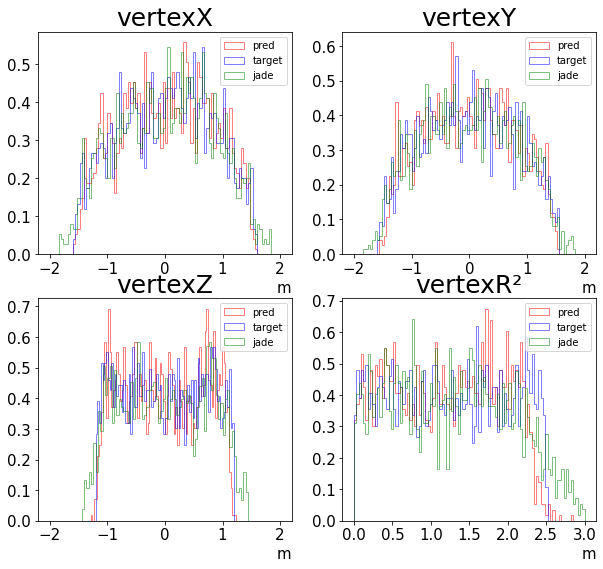

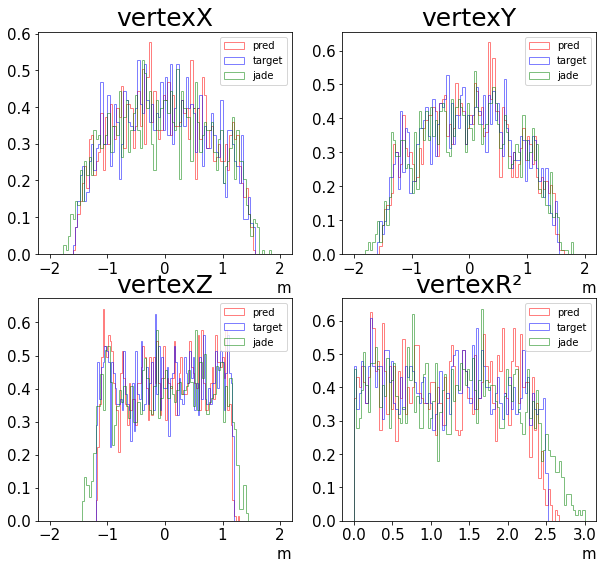

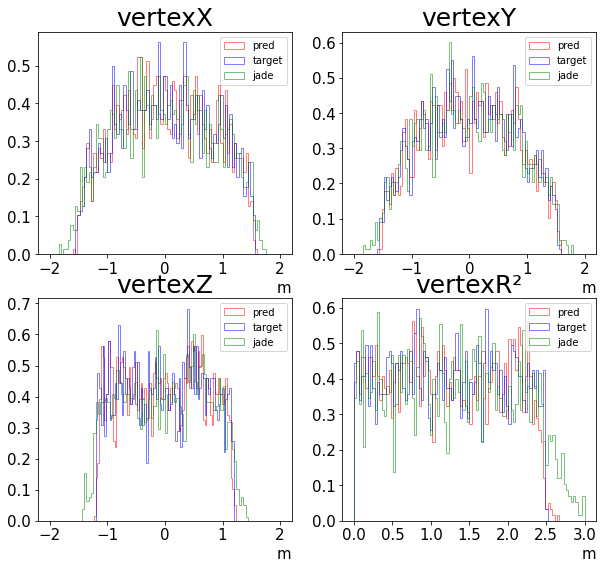

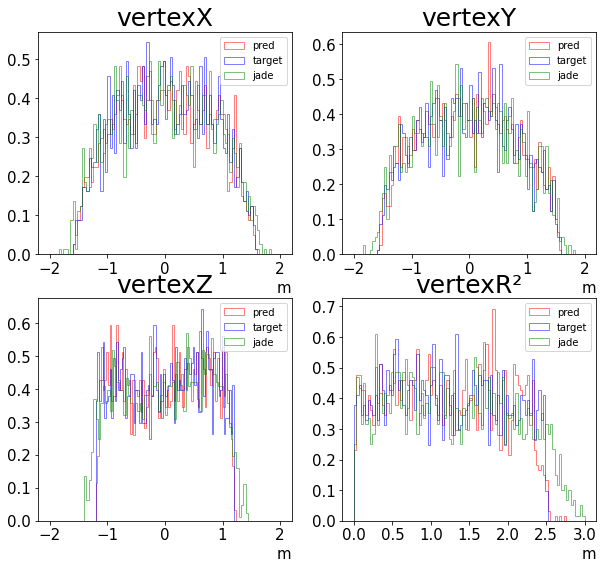

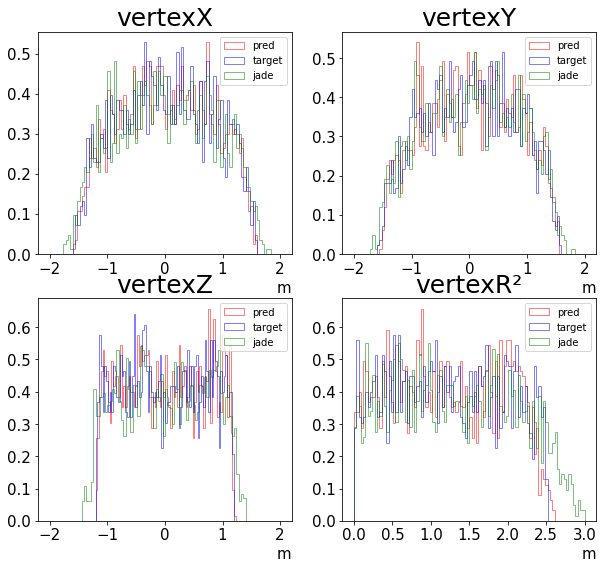

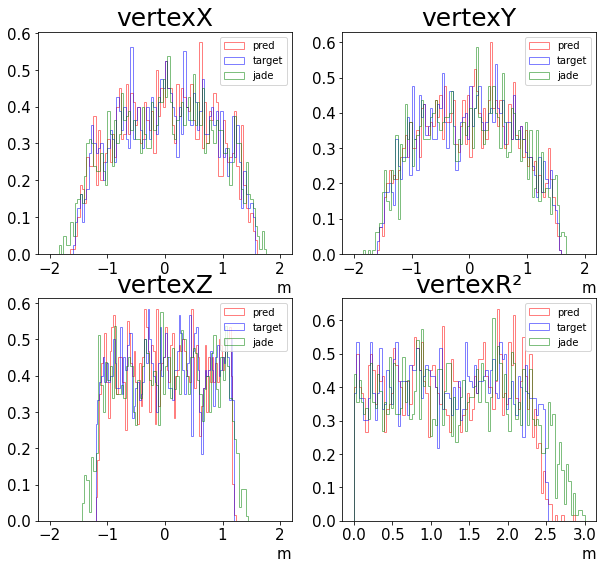

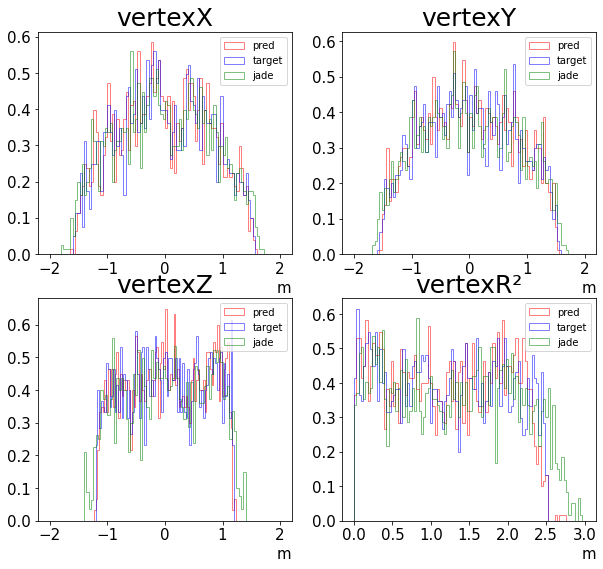

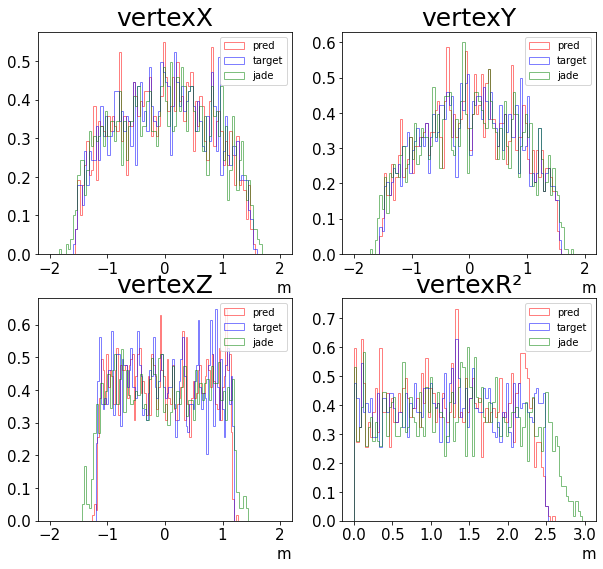

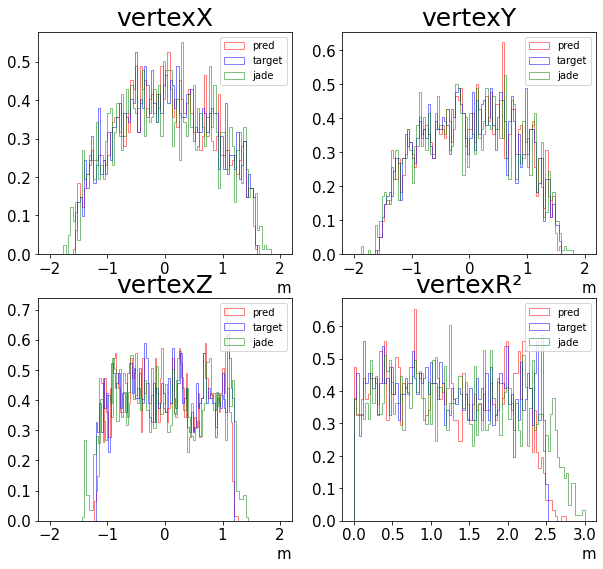

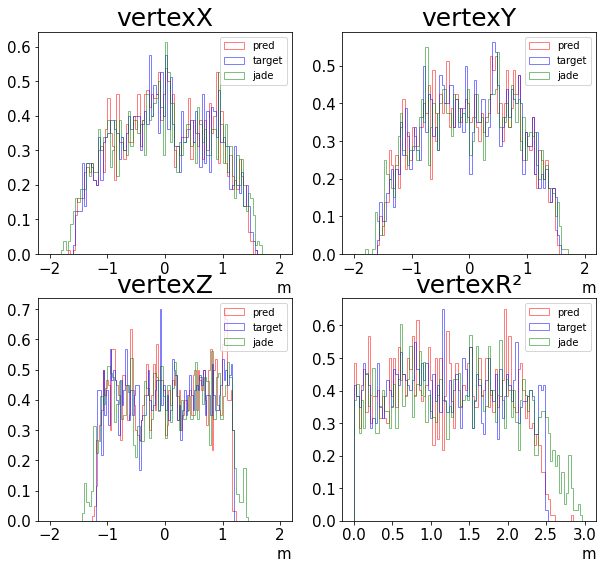

In [13]:
energy_list = [1,2,3,4,5,6,7,8,9,10]
for a in energy_list:
    plt.rcParams['figure.figsize'] = (10, 9)
    plt.subplot(2,2,1)
    ######### jsns2 geo
    plt.hist(pred[:,0][energy == a], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
    plt.hist(label[:,0][energy == a], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')

    plt.hist(jade[:,0][energy == a], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')

    # plt.hist(jade[:,0], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')
    plt.title('vertexX',fontsize = 25)
    # plt.xlim([-0.0005,0])
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel("m", fontsize=15, loc='right')
    plt.legend()


    plt.subplot(2,2,2)

    plt.hist(pred[:,1][energy == a], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
    plt.hist(label[:,1][energy == a], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
    plt.hist(jade[:,1][energy == a], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')

    plt.title('vertexY',fontsize = 25)
    # plt.xlim([-0.00016,0])
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel("m", fontsize=15, loc='right')
    plt.legend()

    plt.subplot(2,2,3)
    plt.hist(pred[:,2][energy == a], bins = 100, range = [-1.5,1.5], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
    plt.hist(label[:,2][energy == a], bins = 100, range = [-1.5,1.5], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
    plt.hist(jade[:,2][energy == a], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')
    plt.title('vertexZ',fontsize = 25)
    # plt.xlim([-3,3])
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel("m", fontsize=15, loc='right')
    plt.legend()


    plt.subplot(2,2,4)
    plt.hist((pred[:,0][energy == a]**2+pred[:,1][energy == a]** 2), bins = 100, range = [0,3], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
    plt.hist((label[:,0][energy == a]**2+label[:,1][energy == a]**2), bins = 100, range = [0,3], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
    plt.hist((jade[:,0][energy == a]**2+jade[:,1][energy == a]**2), bins = 100, range = [0,3], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')

    plt.title('vertexR\u00b2',fontsize = 25)
    # plt.xlim([-1,6])
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel("m", fontsize=15, loc='right')
    plt.legend()
    plt.show()


/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in true_divide


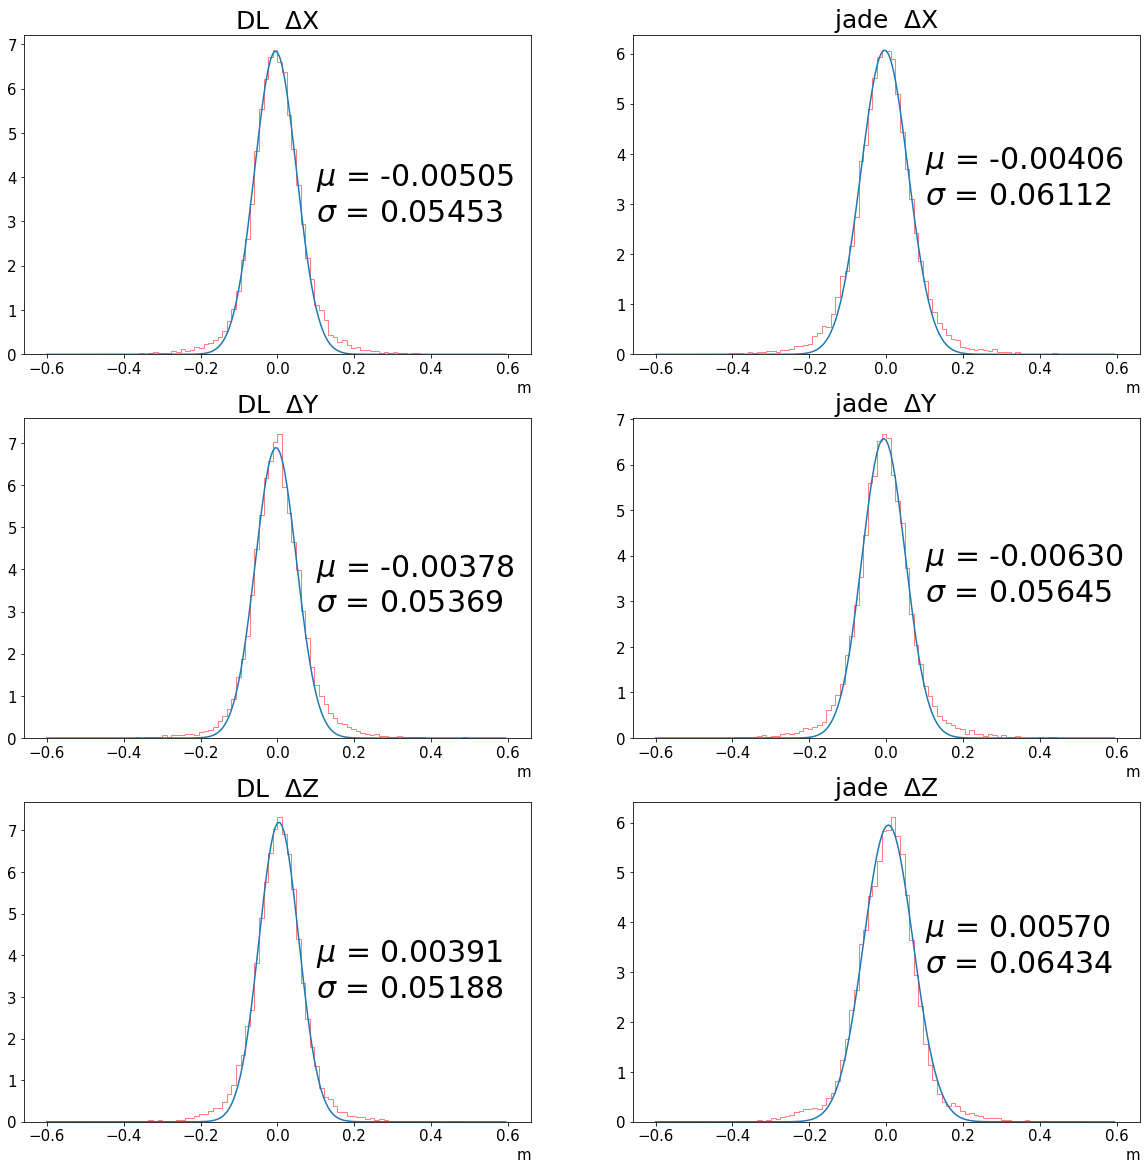

In [14]:
from scipy.optimize import curve_fit

ran = 0.6
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f
plt.rcParams['figure.figsize'] = (20, 20)
plt.subplot(3,2,1)
tmp_hist = plt.hist(pred[:,0] - label[:,0],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('DL  ' + r'$\Delta$X',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,3)

tmp_hist = plt.hist(pred[:,1] - label[:,1],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('DL  ' + r'$\Delta$Y',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,5)
tmp_hist = plt.hist(pred[:,2] - label[:,2],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('DL  ' + r'$\Delta$Z',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')


plt.subplot(3,2,2)
tmp_hist = plt.hist(jade[:,0] - label[:,0],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('jade  ' + r'$\Delta$X',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,4)

tmp_hist = plt.hist(jade[:,1] - label[:,1],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('jade  ' + r'$\Delta$Y',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,6)
tmp_hist = plt.hist(jade[:,2] - label[:,2],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran, ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('jade  ' + r'$\Delta$Z',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')

plt.show()



/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in true_divide


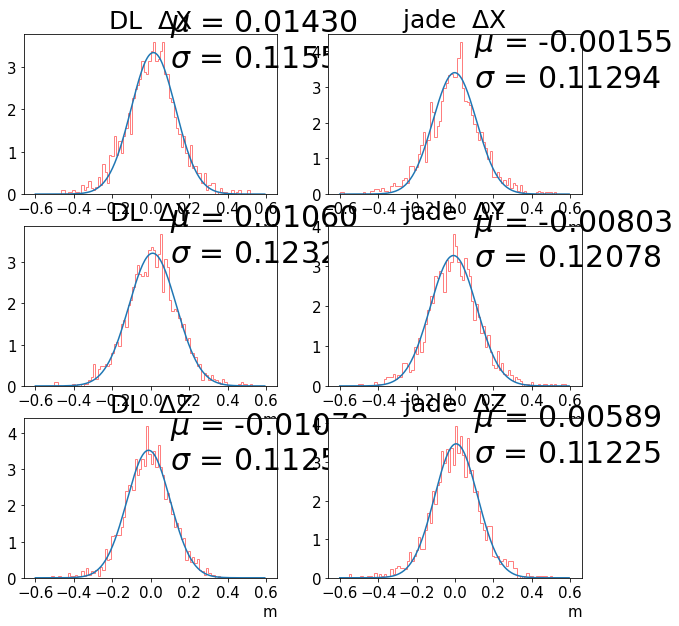

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in true_divide


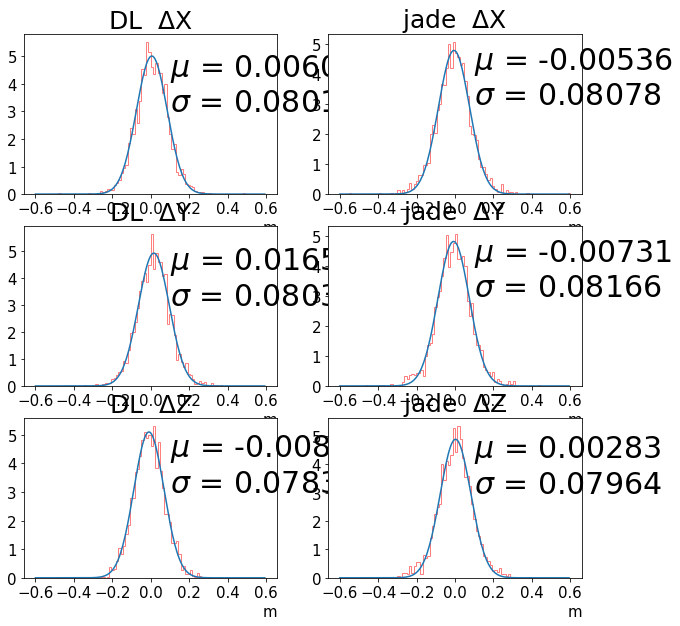

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in true_divide


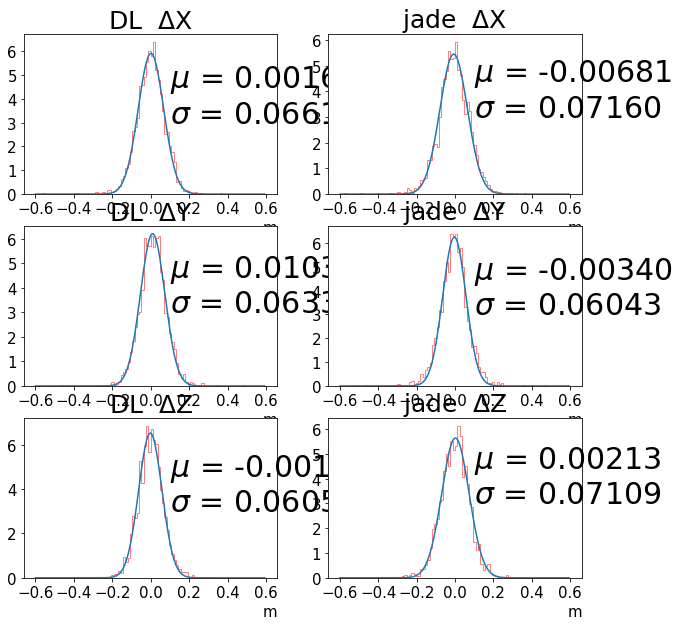

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in true_divide


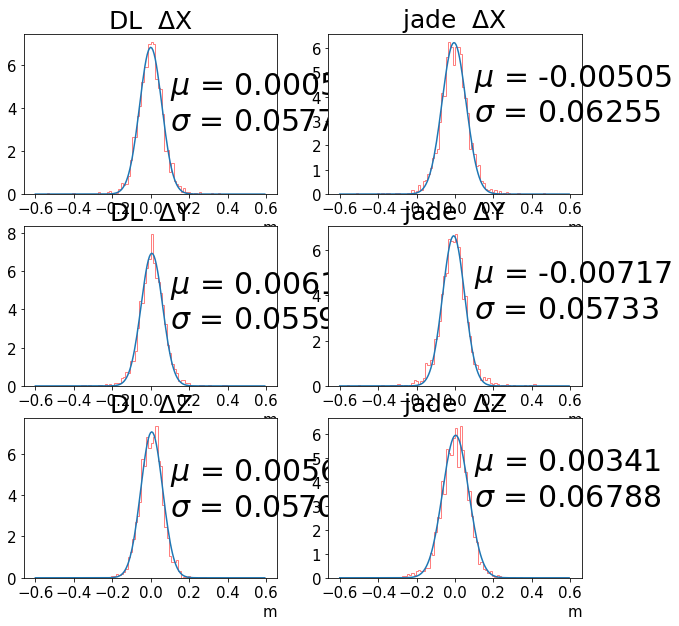

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in true_divide


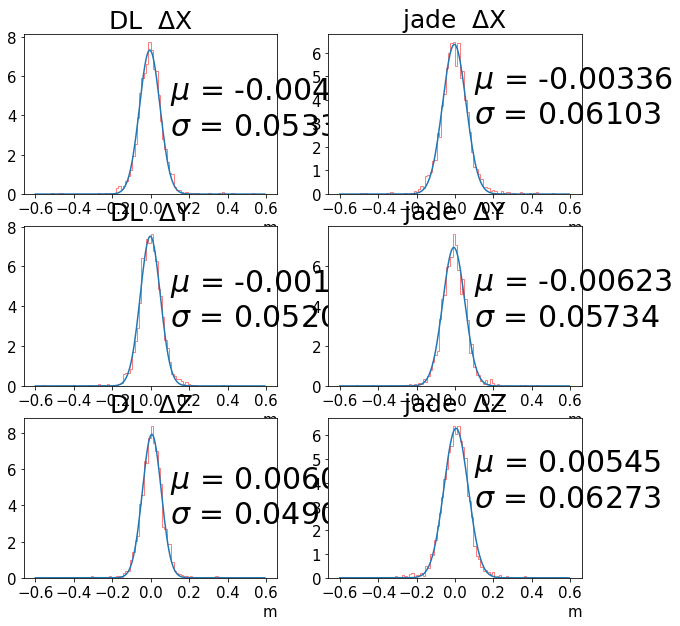

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in true_divide


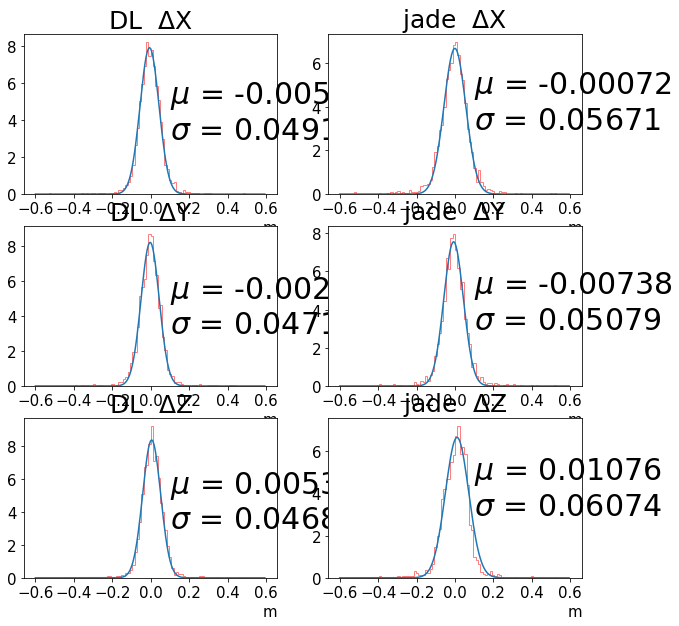

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in true_divide


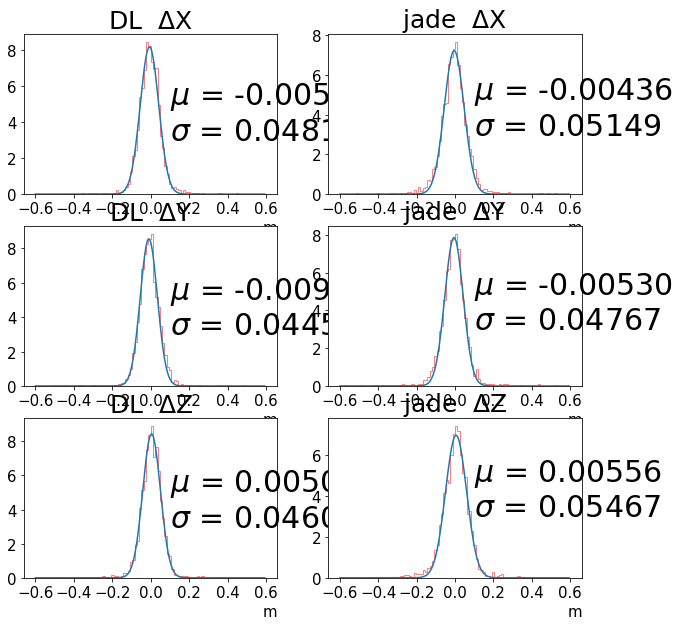

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in true_divide


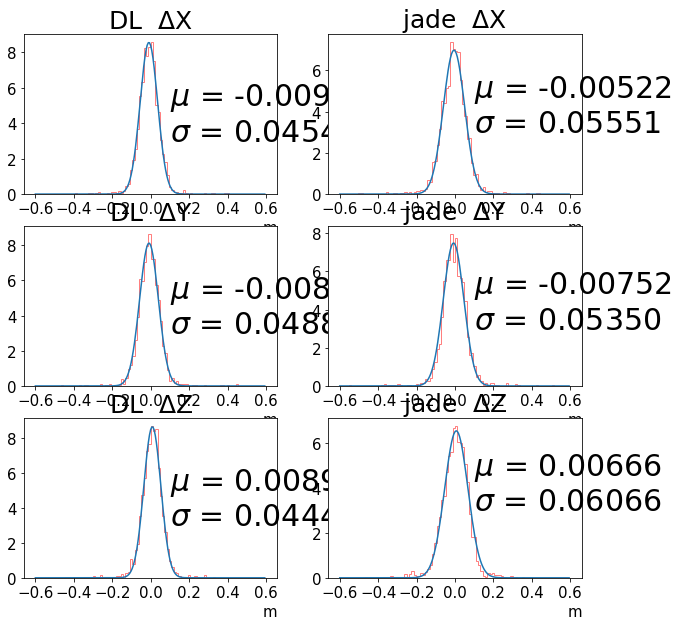

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in true_divide


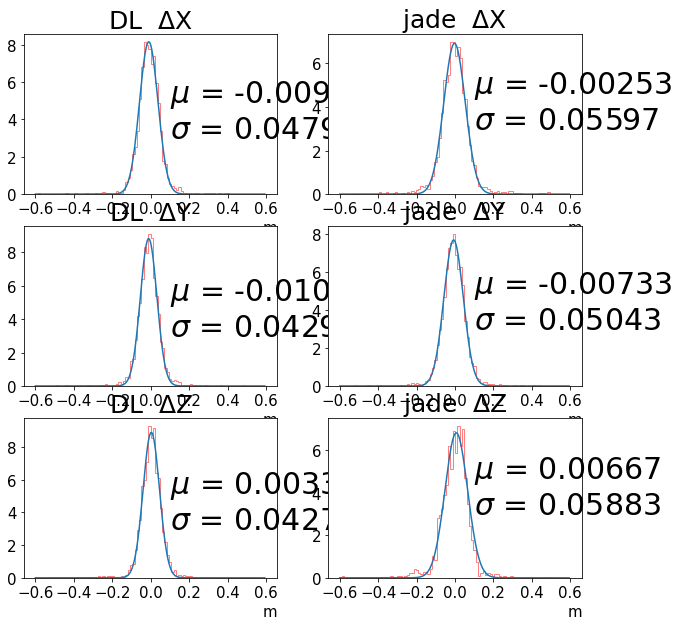

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in true_divide


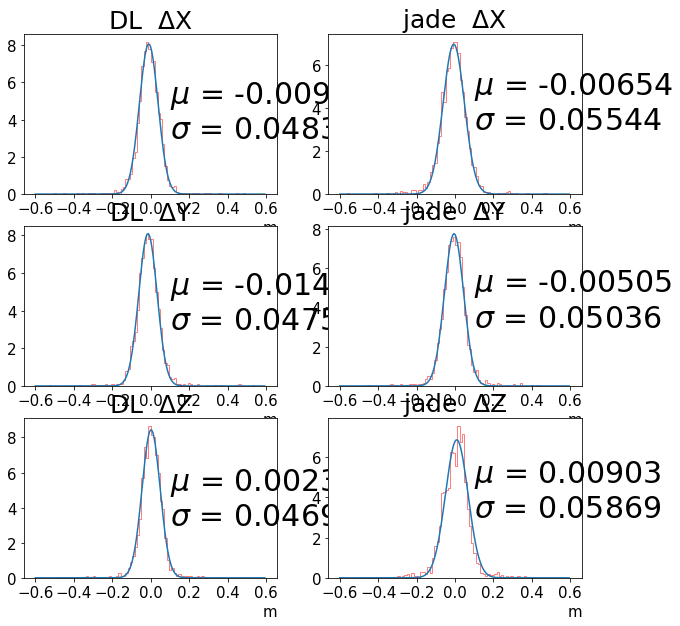

In [15]:
from scipy.optimize import curve_fit
for a in energy_list:
    ran = 0.6
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.subplot(3,2,1)
    tmp_hist = plt.hist(pred[:,0][energy == a] - label[:,0][energy == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
    hist_xx = np.arange(-ran,ran,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('DL  ' + r'$\Delta$X',fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    plt.xlabel("m", fontsize=15, loc='right')
    plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)
    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



    plt.subplot(3,2,3)

    tmp_hist = plt.hist(pred[:,1][energy == a] - label[:,1][energy == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
    hist_xx = np.arange(-ran,ran,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('DL  ' + r'$\Delta$Y',fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel("m", fontsize=15, loc='right')
    plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



    plt.subplot(3,2,5)
    tmp_hist = plt.hist(pred[:,2][energy == a] - label[:,2][energy == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
    hist_xx = np.arange(-ran,ran,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('DL  ' + r'$\Delta$Z',fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel("m", fontsize=15, loc='right')
    plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')


    plt.subplot(3,2,2)
    tmp_hist = plt.hist(jade[:,0][energy == a] - label[:,0][energy == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
    hist_xx = np.arange(-ran,ran,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('jade  ' + r'$\Delta$X',fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    plt.xlabel("m", fontsize=15, loc='right')
    plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)
    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



    plt.subplot(3,2,4)

    tmp_hist = plt.hist(jade[:,1][energy == a] - label[:,1][energy == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
    hist_xx = np.arange(-ran,ran,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('jade  ' + r'$\Delta$Y',fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel("m", fontsize=15, loc='right')
    plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



    plt.subplot(3,2,6)
    tmp_hist = plt.hist(jade[:,2][energy == a] - label[:,2][energy == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
    hist_xx = np.arange(-ran, ran,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('jade  ' + r'$\Delta$Z',fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel("m", fontsize=15, loc='right')
    plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')

    plt.show()



In [16]:
# plt.subplot(4,1,1)
R2_label = np.power(label[:,0],2)+np.power(label[:,1],2)
R2_pred = np.power(pred[:,0],2)+np.power(pred[:,1],2)
Z_label = label[:,2]
Z_pred = pred[:,2]
R2_jade = np.power(jade[:,0],2)+np.power(jade[:,1],2)
Z_jade = jade[:,2]

In [17]:
ZZ = [8,0.4,-0.4,-8]

RR = [0,0.7,1.4,20]

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipyk

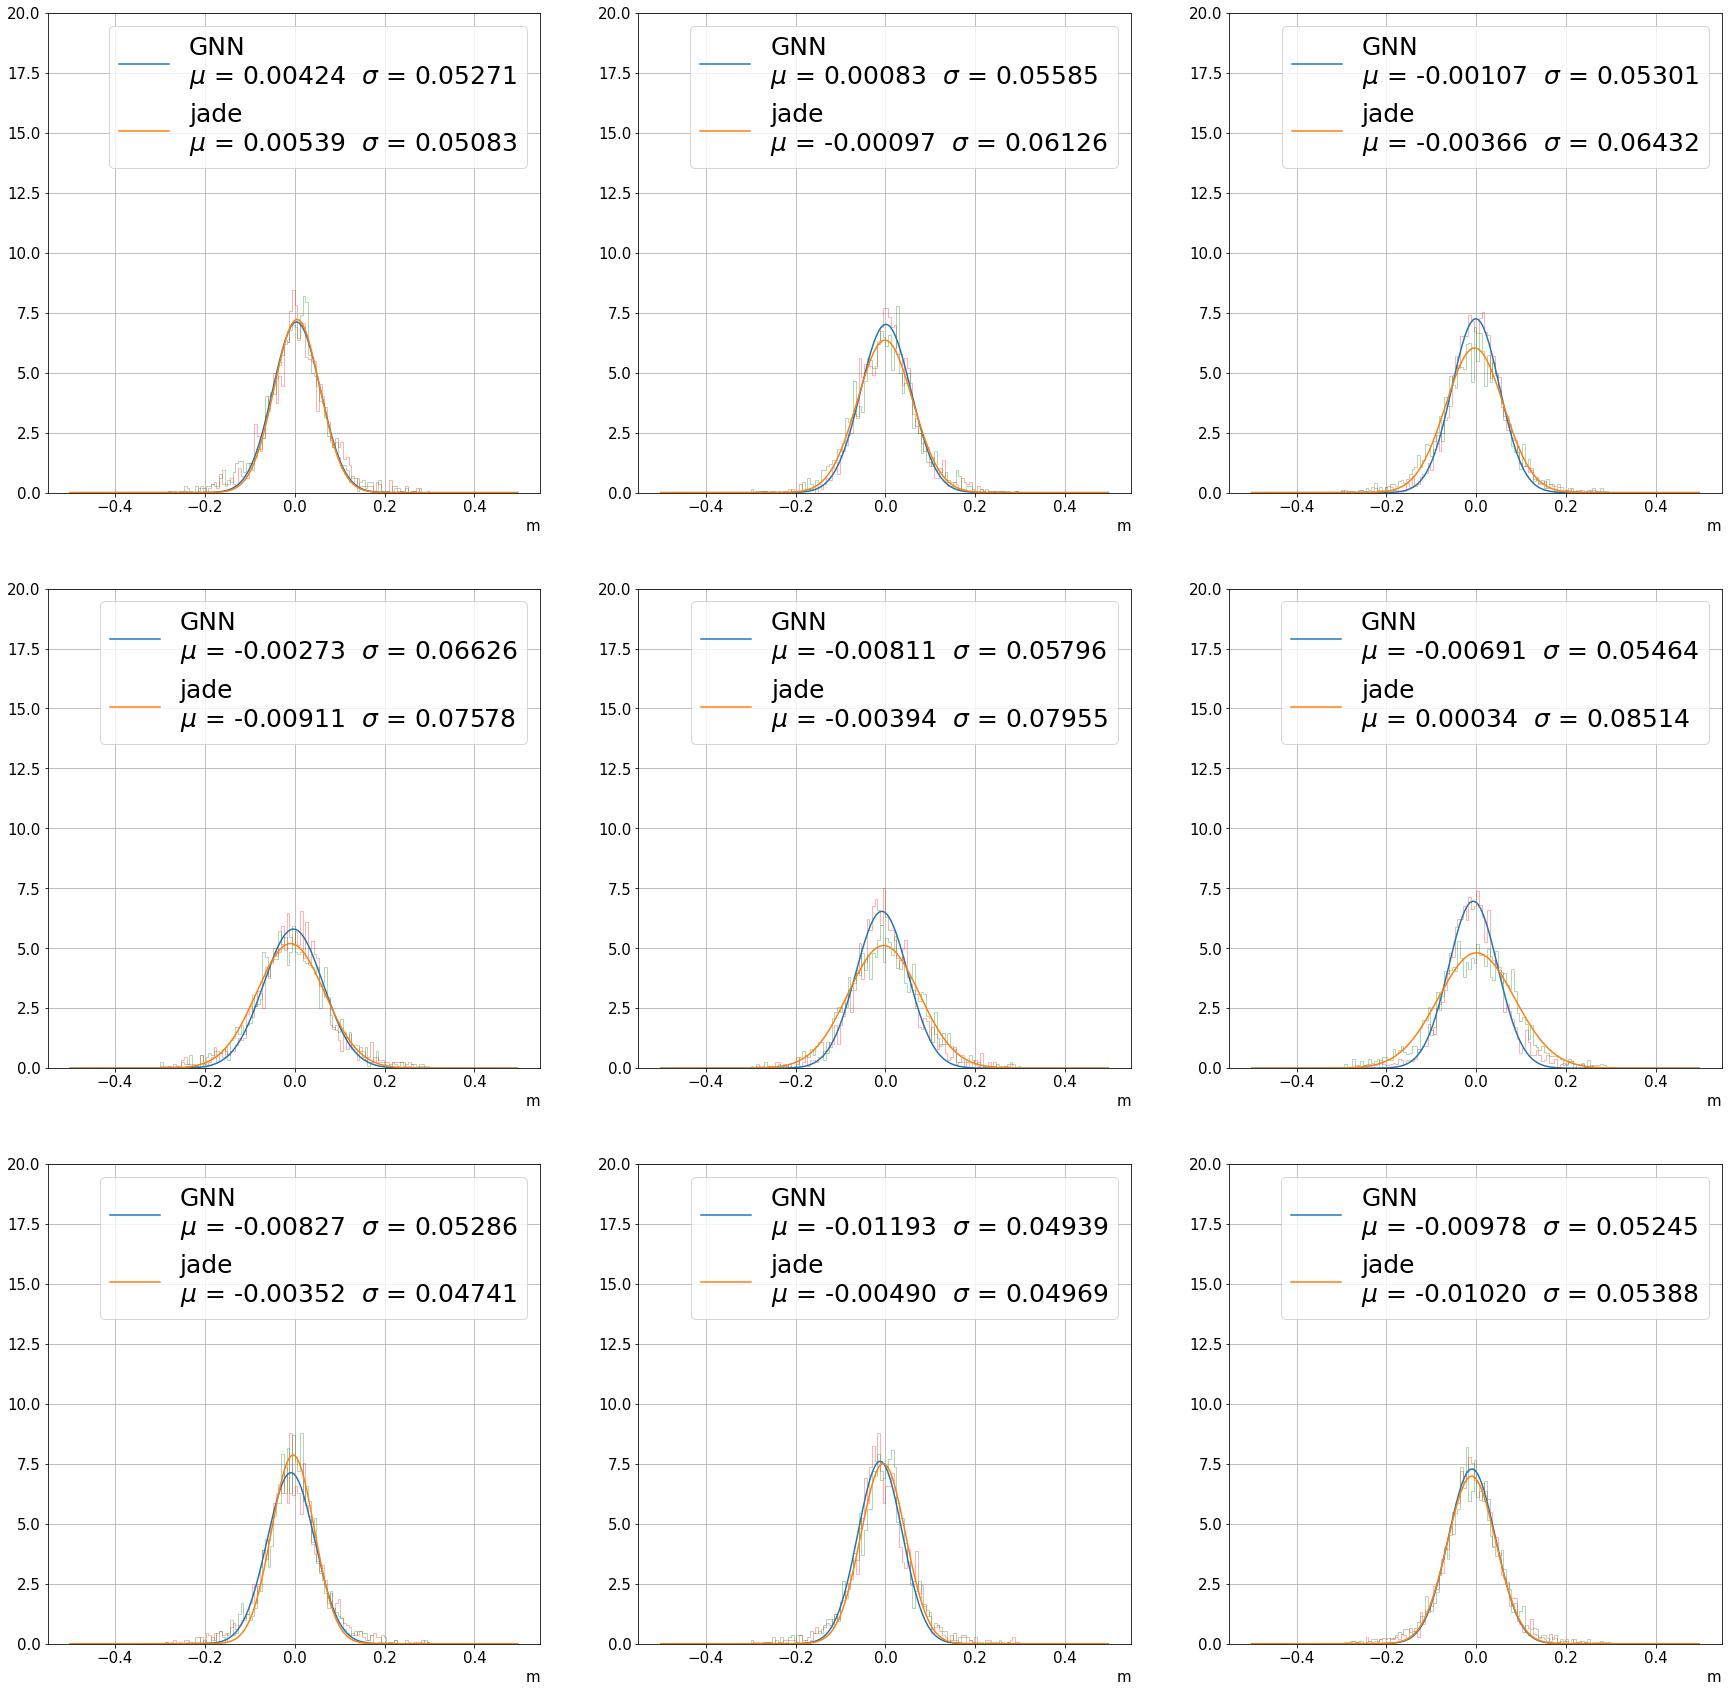

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipyk

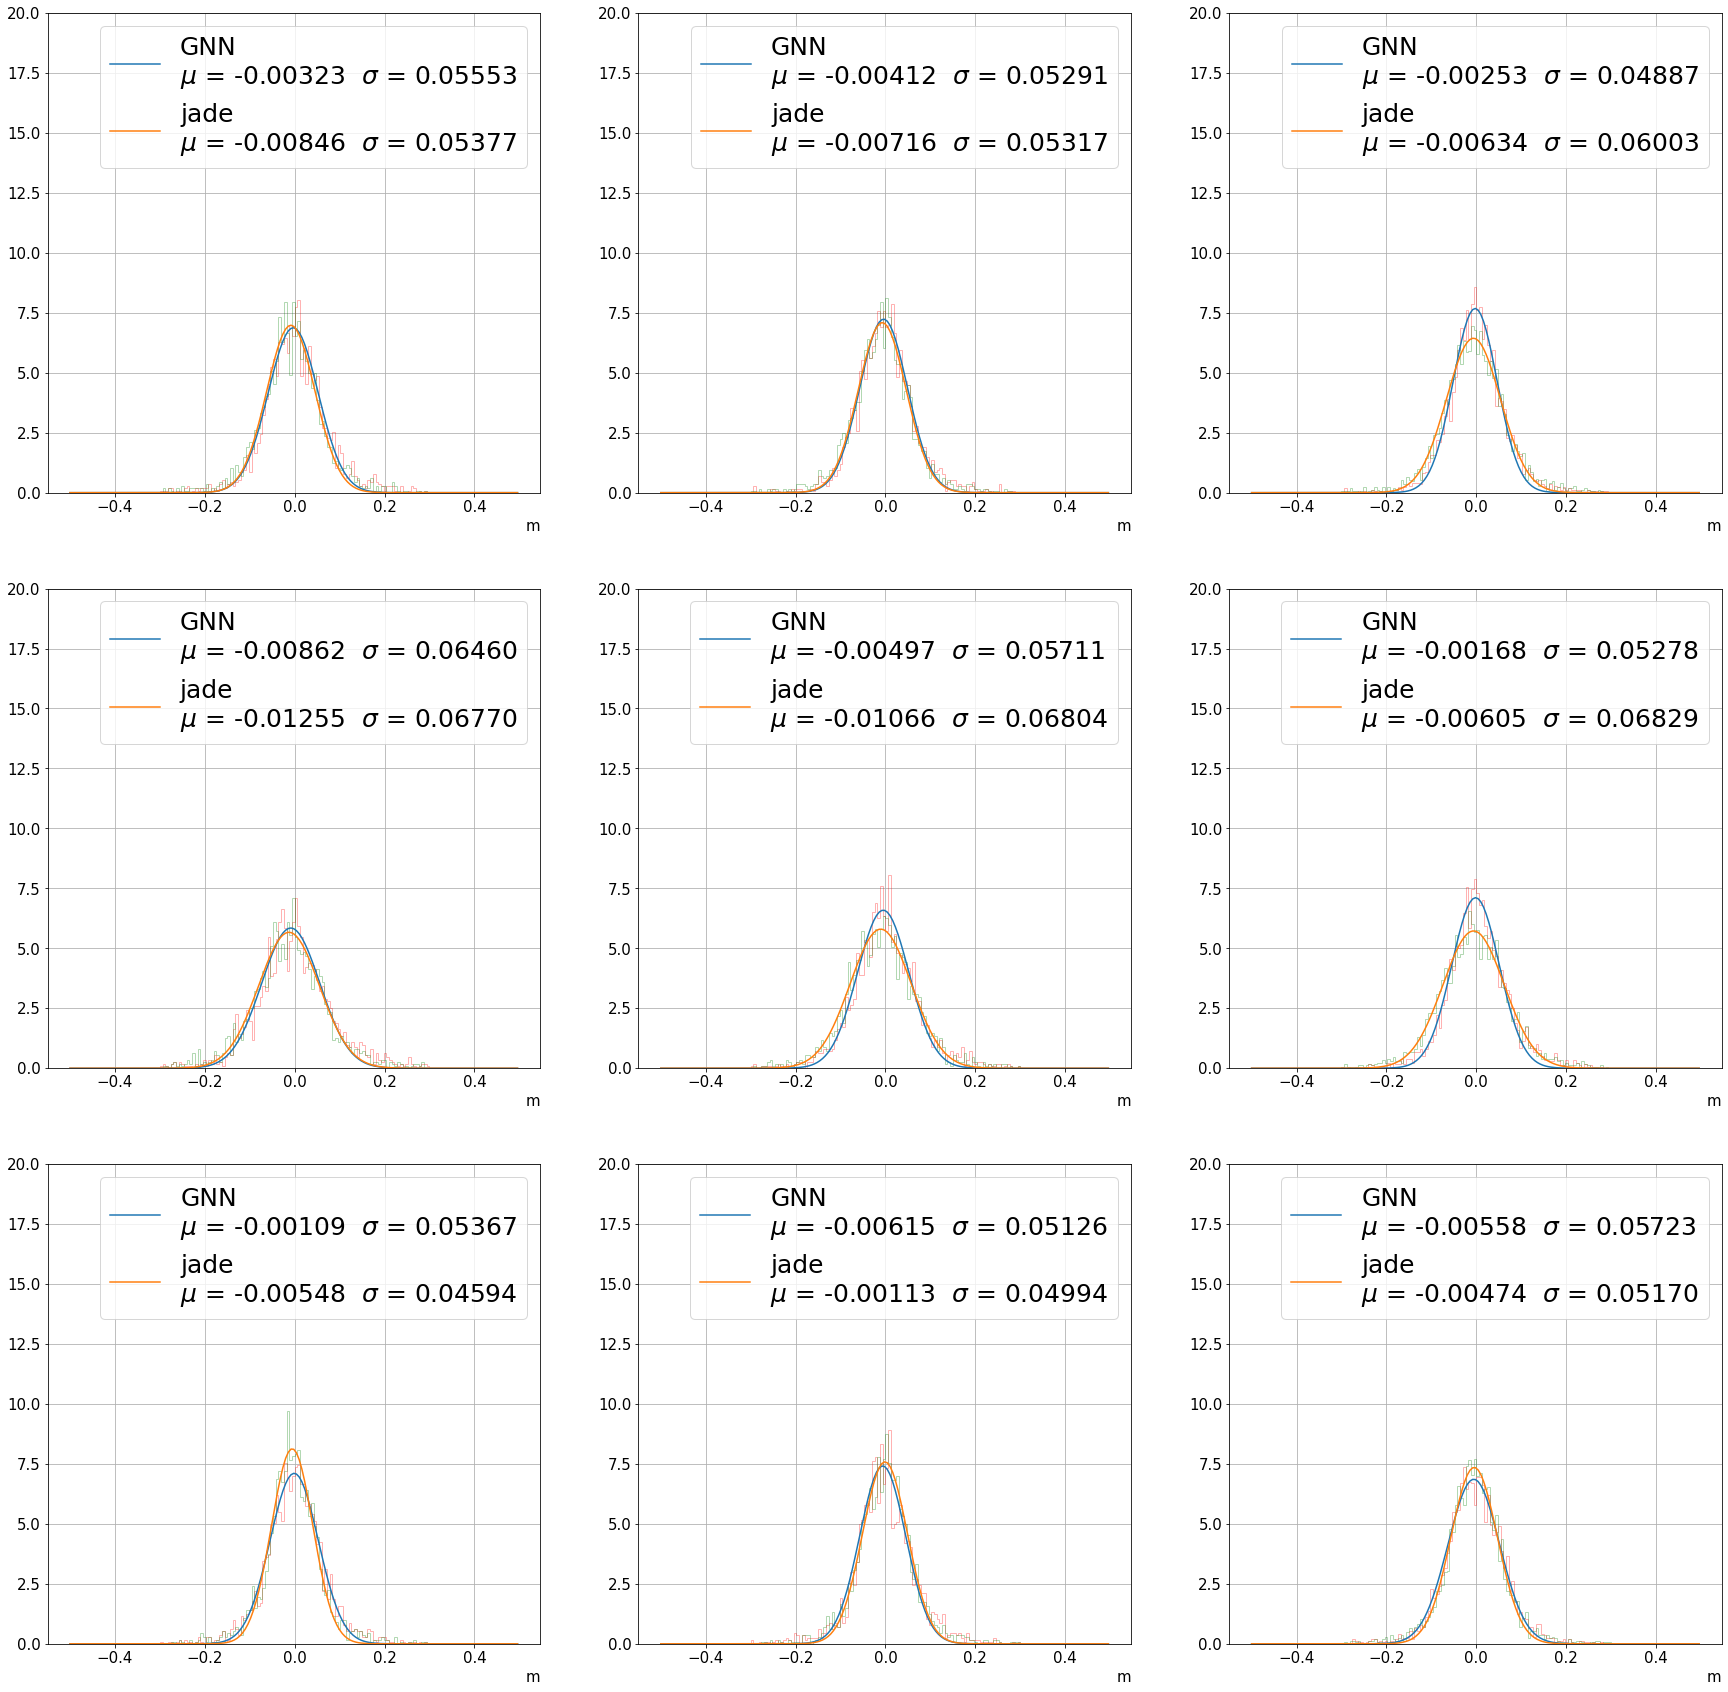

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipyk

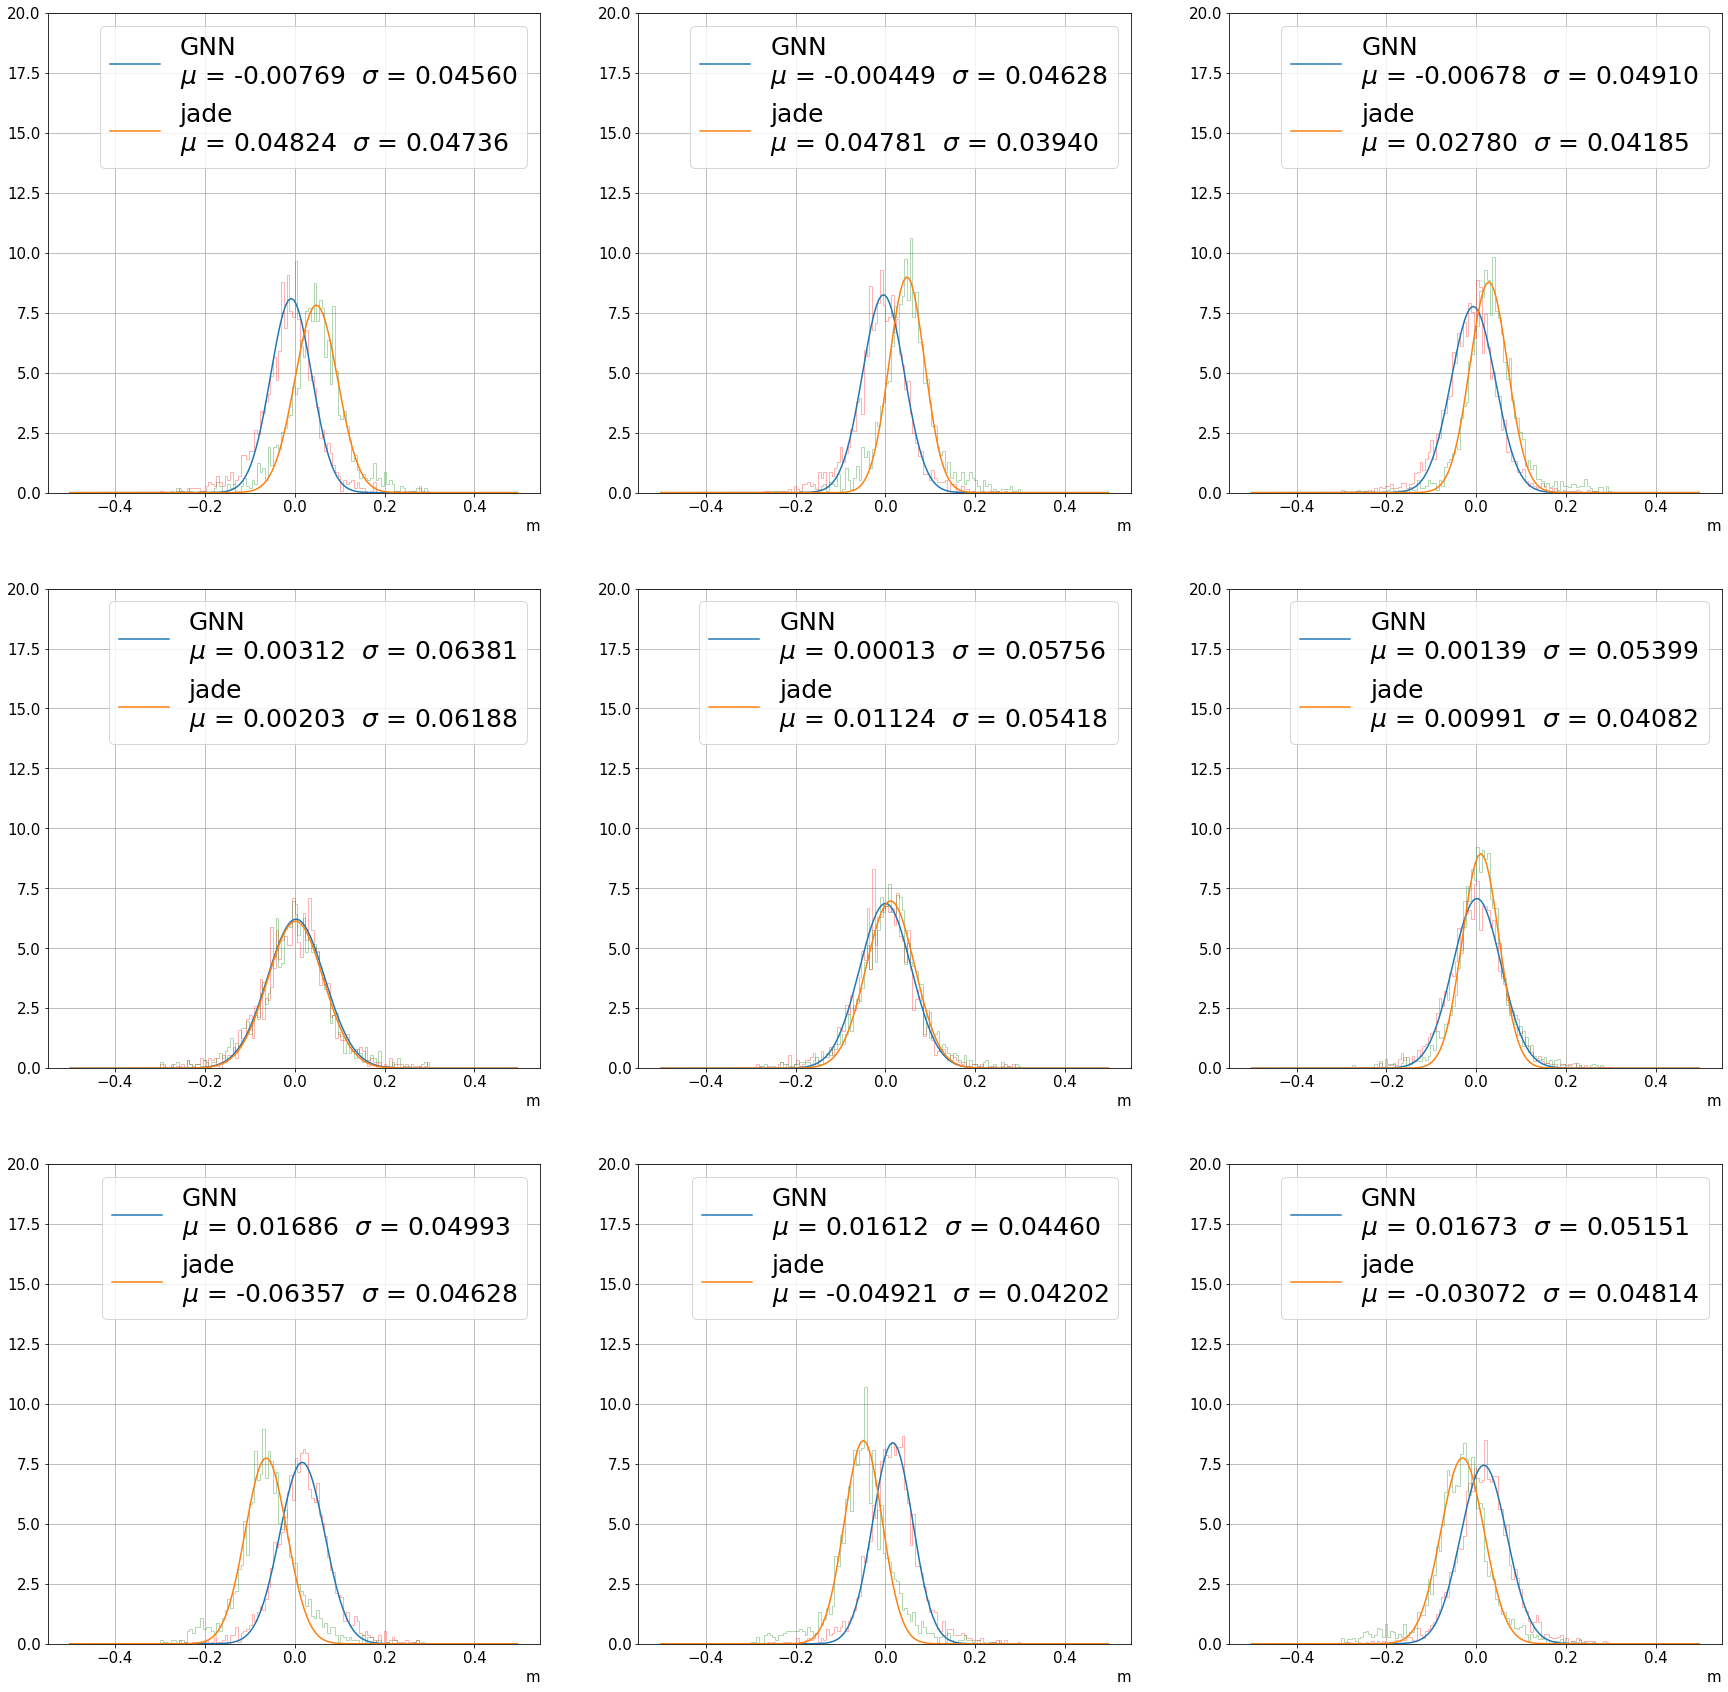

In [18]:
for ver in range(3):
##################
    plt.rcParams['figure.figsize'] = (30, 30)
    for k in range(3):
        for j in range(3):


            plt.subplot(3,3,3*k+(j+1))

            tmp_hist = plt.hist(pred[:,ver][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])] - label[:,ver][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])],bins = 100, range = [-0.3,0.3], color= 'r', alpha = 0.3, density = True, histtype = 'step')
            tmp_hist_jade = plt.hist(jade[:,ver][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])] - label[:,ver][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])],bins = 100, range = [-0.3,0.3], color= 'g', alpha = 0.3, density = True, histtype = 'step')

            hist_N = tmp_hist[0]
            hist_x = []

            hist_N_jade = tmp_hist_jade[0]
            hist_x_jade = []

            for i in range(len(tmp_hist[1])-1):
                tmp = tmp_hist[1]
                hist_x.append((tmp[i] + tmp[i+1])/2.)
            hist_x = np.array(hist_x)

            for i in range(len(tmp_hist_jade [1])-1):
                tmp_jade  = tmp_hist_jade [1]
                hist_x_jade .append((tmp_jade [i] + tmp_jade [i+1])/2.)
            hist_x_jade  = np.array(hist_x_jade )

            popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
            hist_xx = np.arange(-0.5, 0.5,0.6/100.)


            popt_jade, pcov_jade = curve_fit(gaussian, hist_x_jade, hist_N_jade, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N_jade), absolute_sigma=True)
            hist_xx_jade = np.arange(-0.5, 0.5,0.6/100.)


            ##A = popt[0]; mu = popt[1]; sigma = popt[2]
        #         plt.title(r'$\Delta$X',fontsize = 25)
            plt.xticks(fontsize = 15)
            plt.yticks(fontsize = 15)

            plt.xlabel("m", fontsize=15, loc='right')
        #         plt.text(-0.3,15,'GNN\n'+r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=10)
            plt.plot(hist_xx, gaussian(hist_xx,*popt),label='GNN\n'+r'$\mu$ = ' +f"{popt[1]:.5f}"+'  $\sigma$ = ' +f"{np.abs(popt[2]):.5f}")


        #         plt.text(0,15,'jade\n'+r'$\mu$ = ' +f"{popt_jade[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt_jade[2]):.5f}",fontsize=10)
            plt.plot(hist_xx_jade, gaussian(hist_xx_jade,*popt_jade),label='jade\n'+r'$\mu$ = ' +f"{popt_jade[1]:.5f}"+'  $\sigma$ = ' +f"{np.abs(popt_jade[2]):.5f}")
        #         plt.vlines(0,0,15,colors='red')
            plt.grid()
            plt.ylim([0,20])        
            plt.legend(fontsize = 25)
    plt.show()